In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_excel('Customer Churn.xlsx')

In [3]:
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [5]:
q1 = df['Call  Failure'].quantile(0.25)
q3 = df['Call  Failure'].quantile(0.75)
IQR = q3 - q1
print(IQR)
lower_fence = q1 - 1.5*IQR
upper_fence = q3 + 1.5*IQR
lower_fence,upper_fence

11.0


(-15.5, 28.5)

<Axes: >

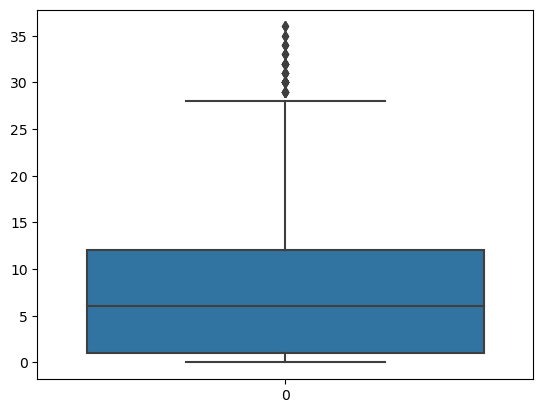

In [6]:
sn.boxplot(df['Call  Failure'])

In [7]:
df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

<Axes: >

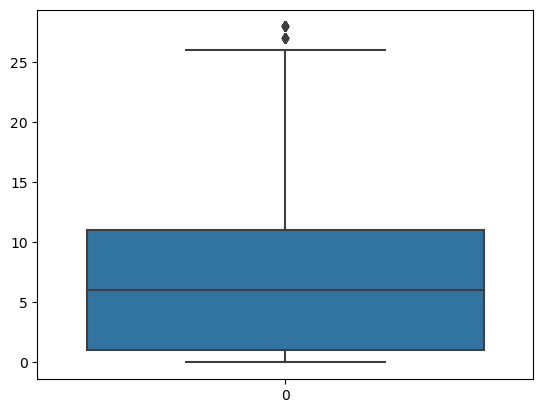

In [8]:
churn = df [df['Call  Failure']< upper_fence]
sn.boxplot(churn["Call  Failur"])

In [9]:
minMaxScaler = preprocessing.MinMaxScaler()

In [10]:
churn[['Call  Failure','Complains','Subscription  Length','Charge  Amount','Seconds of Use','Frequency of use',
       'Frequency of SMS','Distinct Called Numbers','Age Group','Tariff Plan','Status','Age','Customer Value','Churn']]
churn.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


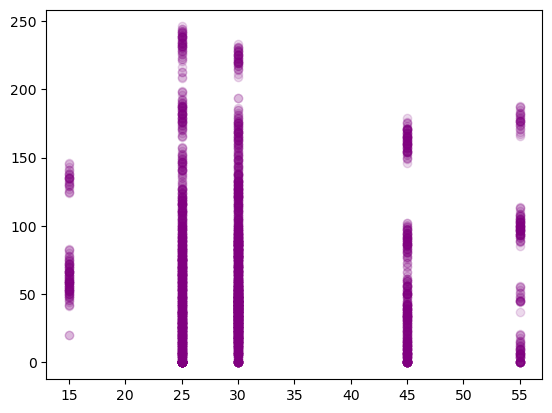

In [11]:
#scatter plot purpuse is to find the relationship between two variables
plt.scatter(x=churn['Age'],y=churn['Frequency of use'],alpha=0.15,c='purple')
plt.show()

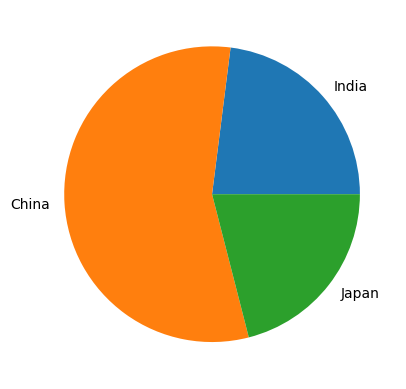

In [12]:
#pie chart
country=['India','China','Japan']
poplulation = [23,56,100 - 23 - 56]
plt.pie(poplulation,labels=country)
plt.show()

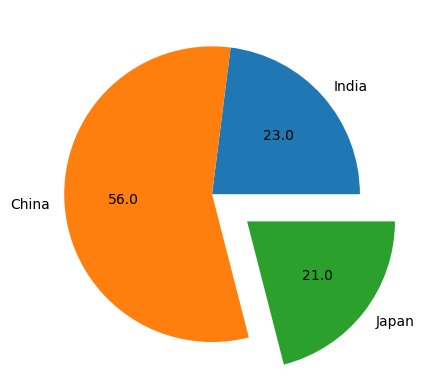

In [13]:
slice = (0,0,0.3)
plt.pie(poplulation,labels=country,autopct='%0.1f',explode=slice)
plt.show()

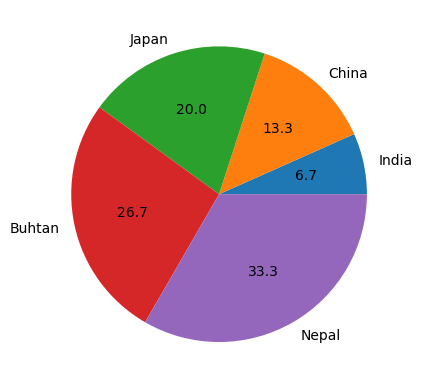

In [14]:
label = ['India','China','Japan','Buhtan','Nepal']
values = [10,20,30,40,50]
plt.pie(values,labels=label,autopct='%0.1f')
plt.show()

<Axes: >

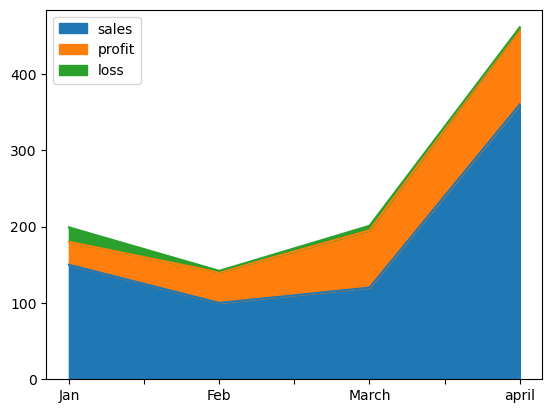

In [15]:
#area plot
data = {"sales": [150,100,120,360],"profit":[30,40,75,100],'loss':[19,2,6,1]}
months = ('Jan','Feb','March',"april")
chart = pd.DataFrame(data,index=months)
chart.plot.area()

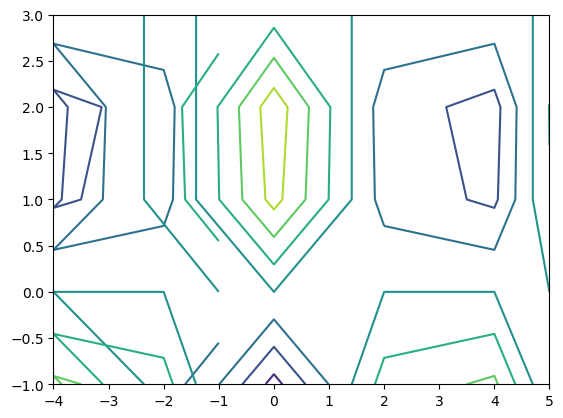

In [20]:
#contour plot
x=[-1,-4,-2,0,2,4,5]
y=[-1,-1,-1,0,1,2,3]
xValue,yValue = np.meshgrid(x,y)
zValue = np.cos(xValue)*np.sin(yValue)
plt.contour(xValue,yValue,zValue)
plt.show()

<Axes: xlabel='count', ylabel='Age'>

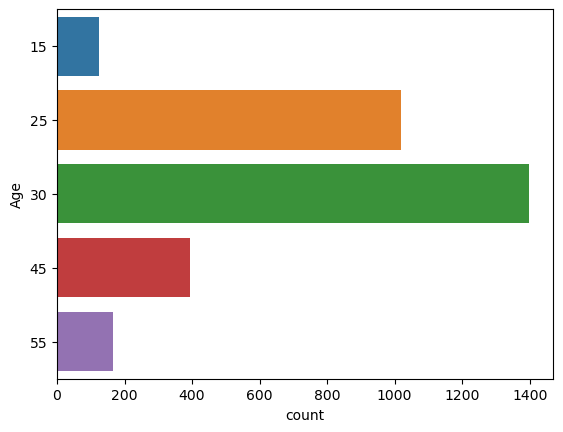

In [29]:
#count plot
sn.countplot(y='Age',data=churn)

<Axes: xlabel='Complains', ylabel='Frequency of SMS'>

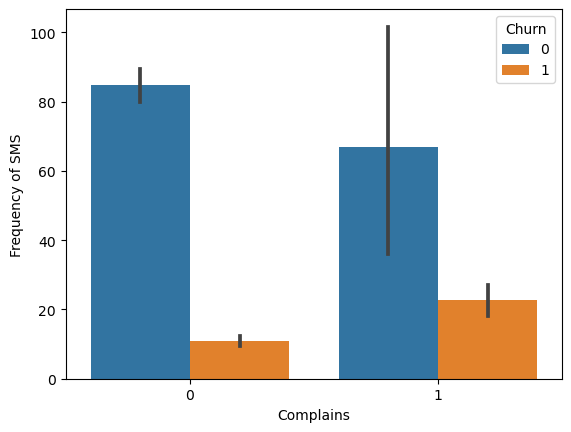

In [38]:
#barplot (mix both continious and catagorial values)
sn.barplot(x=churn['Complains'],y=churn['Frequency of SMS'],hue=churn['Churn'])

<Axes: xlabel='Call  Failure', ylabel='Complains'>

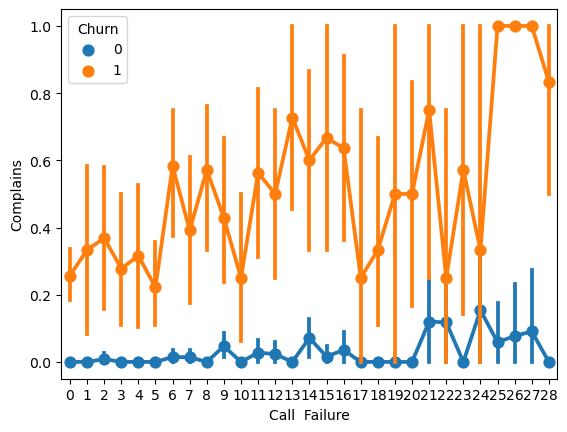

In [48]:
sn.pointplot(x=churn['Call  Failure'],y=churn['Complains'],hue=churn['Churn'])

<Axes: >

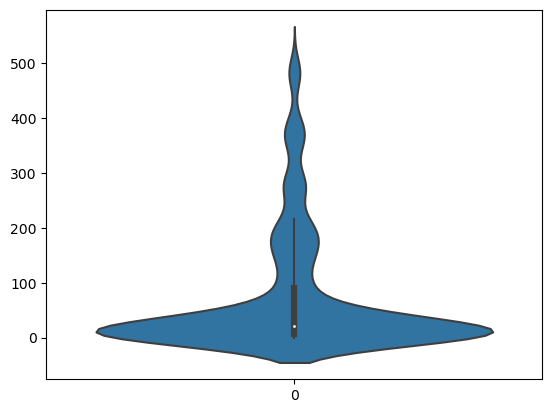

In [56]:
#violin plot
sn.violinplot(churn['Frequency of SMS'])

In [61]:
sn.pairplot(x=df['Frequency of SMS'],y=df['Frequency of use'])

TypeError: pairplot() got an unexpected keyword argument 'x'